Los parámetros a usar en el código son los siguientes:

Los Resultados obtenidos por el modelo teórico son: 

    Temperatura [K]
0       1523.150000
1       1471.425862
2       1419.376415
3       1366.998580
4       1314.289241
5       1261.245238
6       1207.863376
7       1154.140415
8       1100.073077
9       1045.658039
10       990.891935
11       935.771359
12       880.292857
13       824.452932
14       768.248039
15       711.674590
16       654.728947
17       597.407426
18       539.706291
19       481.621761
20       423.150000


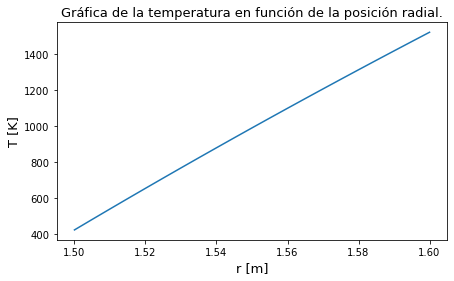

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

R1 = 1.50 #m
R2 = 1.60 #m
T1 = 423.15 #K
T2 = 1523.15 #K
qr = -175 #kW/(m^2)K
k = 0.015 #kW/mK
h = 0.5e-2 #m
r = np.arange(R2, R1, -h)

def T(r):
    return T2 + ((T2 - T1)/(r * ((1/R2) - (1/R1)))) - ((T2 - T1)/(R2 * ((1/R2) - (1/R1))))

TT = pd.DataFrame(T(r), columns = ["Temperatura [K]"])
print("Los Resultados obtenidos por el modelo teórico son: \n")
print(TT)

plt.figure(figsize=(7,4))
plt.plot(r, T(r))
plt.xlabel("r [m]", fontsize=13)
plt.ylabel("T [K]", fontsize=13)
plt.title("Gráfica de la temperatura en función de la posición radial.", fontsize=13)
plt.show()

# Método de Euler.

Se tomará un valor de paso h = 0.5e-2 m y el rango de análisis irá de 1.60 m a 1.50 m; considerando que qr(1.60) = 175 kW/m^2.

Considerando el sistema de ecuaciones mencionado anteriormente, tendremos la siguiente muestra de cálculo:

-El metodo de Euler consiste en partir de una función inicial la cual será:

$$f = \frac{dq_r}{dr} = \frac{-2q}{r}$$

-La ecuación que relaciona la función atenrior con la temperatura (denotada con p, en el código) está dada por:

$$\frac{dT}{dr} = \frac{-q}{k}$$

-El criterio para la iteración de dicho método numérico está dado por:

$$z_{i+1} = z_{i} + h*f(r,q)$$

-Por lo tanto, la ecuaciones empleadas para la iteración por el método numérico de Euler, están dadas por:

$$q_{i+1} = q_{i} + h*f(r[i],q[i])$$

$$p_{i+1} = p_{i} - h*\frac{q_{i}}{-k}$$

-Los valores iniciales para la iteración están dados por:

$$q_{0} = q_r = -175 \ \frac{kW}{m^2K}$$

$$r_{0} = R2 = 1.60 \ m(0.5*10^{-2})$$

$$p_{0} = T2 = 1523.15 \ K$$

-La primera iteración está dada por:

$$q_{1} = q_{0} + h*\frac{-2q_{0}}{R2}$$ 
$$q_{1} = -175 + (0.5*10^{-2})*\frac{-2*-175}{1.60}$$
$$q_{1} = -173.90625 \ \frac{kW}{m^2K}$$

$$p_{1} = p_{0} - h*\frac{q_{0}}{-k}$$
$$p_{1} = 1523.15 - (0.5*10^{-2})*\frac{-175}{-0.015}$$
$$p_{1} = 1464.816667 \ K$$

-La segunda iteración está dada por:

$$q_{2} = q_{1} + h*\frac{-2q_{1}}{R2 - h}$$ 
$$q_{2} = -173.90625 + (0.5*10^{-2})*\frac{-2*-173.90625}{1.55}$$
$$q_{2} = -172.7842742 \ \frac{kW}{m^2K}$$


$$p_{2} = p_{1} - h*\frac{q_{1}}{-k}$$
$$p_{2} = 1464.816667 - (0.5*10^{-2})*\frac{-173.90625}{-0.015}$$
$$p_{2} = 1406.847917 \ K$$


-Las iteraciones siguen la misma lógica, mostrada anteriormente hasta llegar a un valor de r = R1.


Los Resultados obtenidos por el método de Euler son: 

    Temperatura [K]
0       1523.150000
1       1464.816667
2       1406.847917
3       1349.242607
4       1291.999595
5       1235.117738
6       1178.595892
7       1122.432915
8       1066.627665
9       1011.178997
10       956.085769
11       901.346839
12       846.961063
13       792.927299
14       739.244403
15       685.911233
16       632.926646
17       580.289498
18       527.998648
19       476.052952
20       424.451267


La gráfica de los resultados optenidos por el método de Euler es la siguiente: 



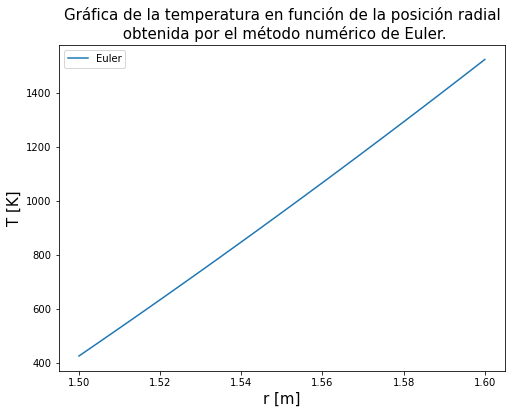

In [2]:
f = lambda r,q: -2*(q/r)

def euler(f):
    q = np.zeros(len(r))
    p = np.zeros(len(r))
    q[0] = qr
    p[0] = T2
    for i in range(0, len(r) - 1):
        q[i + 1] = q[i] + h*f(r[i], q[i])
        p[i + 1] = p[i] - h*q[i]/-k
    return p

E = euler(f)
ET = pd.DataFrame(E, columns = ["Temperatura [K]"])
print("Los Resultados obtenidos por el método de Euler son: \n")
print(ET)


print("\n")
print("La gráfica de los resultados optenidos por el método de Euler es la siguiente: \n")

plt.figure(figsize=(8,6))
plt.plot(r, E)
plt.legend(["Euler"])
plt.xlabel("r [m]", fontsize=15)
plt.ylabel("T [K]", fontsize=15)
plt.title("Gráfica de la temperatura en función de la posición radial\n obtenida por el método numérico de Euler.", fontsize=15)
plt.show()

# Método de Runge-Kutta 4.

Considerando el sistema de ecuaciones mencionado anteriormentetendremos la siguiente muestra de cálculo:

-El metodo de Runge-Kutta 4 consiste en partir de una función inicial la cual será:

$$f = \frac{dq_r}{dr} = \frac{-2q}{r}$$

-La ecuación que relaciona la función atenrior con la temperatura (denotada con p, en el código) está dada por:

$$\frac{dT}{dr} = \frac{-q}{k}$$

-El criterio para la iteración de dicho método numérico está dado por la interrelación de 4 constantes para cada ecuación y están dadas por:

$$q_{i+1} = q_{i} + \frac{(k_1+2*k_2+2*k_3+k_4)}{6}$$

$$p_{i+1} = p_{i} - \frac{(l_1+2*l_2+2*l_3+l_4)}{6}$$

-Por lo tanto, las ecuaciones empleadas para las constantes en la iteración por el método numérico de Runge-Kutta 4, están dadas por:

+Para q:

$$k_1 = h*f(r[i],q[i])$$
$$k_2 = h*f\left(r[i] + \frac{h}{2}, q[i] + \frac{k_1}{2}\right)$$
$$k_3 = h*f\left(r[i] + \frac{h}{2}, q[i] + \frac{k_2}{2}\right)$$
$$k_4 = h*f\left(r[i] + h, q[i] + k_3\right)$$


+Para q:

$$l_1 = h*\frac{q[i]}{-k}$$
$$l_2 = h*\left(\frac{q[i]}{-k} + \frac{k_1}{2}\right)$$
$$l_3 = h*\left(\frac{q[i]}{-k} + \frac{k_2}{2}\right)$$
$$l_4 = h*\left(\frac{q[i]}{-k} + k_3\right)$$


-Los valores iniciales para la iteración están dados por:

$$q_{0} = q_r = -175 \ \frac{kW}{m^2K}$$

$$r_{0} = R2 = 1.60 \ m$$

$$p_{0} = T2 = 1523.15 \ K$$

-La primera iteración está dada por:

$$k_1 = (0.5*10^{-2})*\frac{-2*-175}{1.60} = 1.09375$$
$$k_2 = (0.5*10^{-2})*\frac{-2*\left(-175 + \frac{1.09375}{2}\right)}{1.60 + \frac{(0.5*10^{-2})}{2}} = 1.088631045$$
$$k_3 = (0.5*10^{-2})*\frac{-2*\left(-175 + \frac{1.088631045}{2}\right)}{1.60 + \frac{(0.5*10^{-2})}{2}} = 1.088647017$$
$$k_4 = (0.5*10^{-2})*\frac{-2*\left(-175 + 1.088647017\right)}{1.60 + (0.5*10^{-2})} = 1.083559832$$


$$l_1 = (0.5*10^{-2})*\frac{-175}{-0.015} = 58.33333333$$
$$l_2 = (0.5*10^{-2})*\left(\frac{-175}{-0.015} + \frac{1.09375}{2}\right) = 58.33606771$$
$$l_3 = (0.5*10^{-2})*\left(\frac{-175}{-0.015} + \frac{1.088631045}{2}\right) = 58.33605491$$
$$l_4 = (0.5*10^{-2})*\left(\frac{-175}{-0.015} + 1.088647017\right) = 58.33877657$$

+Los valores para q y p de la primera iteración son:

$$q_{1} = -175 + \frac{(1.09375 + 2*1.088631045 + 2*1.088647017 + 1.083559832)}{6}$$ 
$$q_{1} = -173.9113557 \ \frac{kW}{m^2K}$$

$$p_{1} = 1523.15 - \frac{(58.33333333 + 2*58.33606771 + 2*58.33605491 + 58.33877657)}{6}$$
$$p_{1} = 1464.813941 \ K$$

-La segunda iteración está dada por:

$$k_1 = 0.005*\frac{-2*-173.9113557}{1.60-0.005} = 1.090353327$$
$$k_2 = 0.005*\frac{-2*\left(-173.9113557 + \frac{1.090353327}{2}\right)}{(1.60-0.005) + \frac{0.005}{2}} = 1.085234298$$
$$k_3 = 0.005*\frac{-2*\left(-173.9113557 + \frac{1.085234298}{2}\right)}{(1.60-0.005) + \frac{0.005}{2}} = 1.085250320$$
$$k_4 = 0.005*\frac{-2*\left(-173.9113557 + 1.085250320\right)}{(1.60-0.005) + 0.005} = 1.080163159$$

$$l_1 = 0.005*\frac{-173.9113557}{-0.015} = 57.97045190$$
$$l_2 = 0.005*\left(\frac{-173.9113557}{-0.015} + \frac{1.090353327}{2}\right) = 57.97317778$$
$$l_3 = 0.005*\left(\frac{-173.9113557}{-0.015} + \frac{1.085234298}{2}\right) = 57.97316499$$
$$l_4 = 0.005*\left(\frac{-173.9113557}{-0.015} + 1.080163159\right) = 57.97585272$$

+Los valores para q y p de la segunda iteración son:

$$q_{2} = -173.9113557 + \frac{(1.090353327 + 2*1.085234298 + 2*1.085250320 + 1.080163159)}{6}$$ 
$$q_{2} = -172.8261081 \ \frac{kW}{m^2K}$$

$$p_{2} = 1464.813941 - \frac{(57.97045190 + 2*57.97317778 + 2*57.97316499 + 57.97585272)}{6}$$
$$p_{2} = 1404.840772 \ K$$

-Las iteraciones siguen la misma lógica, mostrada anteriormente hasta llegar a un valor de r = R1.

Los Resultados obtenidos por el método de Runge-Kutta 4 son: 

    Temperatura [K]
0       1523.150000
1       1464.813941
2       1406.840772
3       1349.229360
4       1291.978574
5       1235.087281
6       1178.554349
7       1122.378646
8       1066.559039
9       1011.094397
10       955.983587
11       901.225476
12       846.818934
13       792.762826
14       739.056022
15       685.697388
16       632.685793
17       580.020105
18       527.699190
19       475.721918
20       424.087155


La gráfica de los resultados optenidos por el método de Runge-Kutta 4 es la siguiente: 



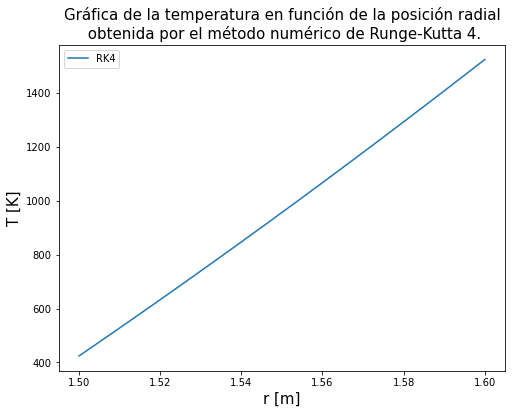

In [3]:
def R_K_4(f):
    q = [qr]
    p = [T2]
    for i in range(len(r) - 1):
        l1 = h*q[i]/-k
        k1 = h*f(r[i], q[i])
        l2 = h*(q[i]/-k + k1/2)
        k2 = h*f(r[i] + h/2, q[i] + k1/2)
        l3 = h*(q[i]/-k + k2/2)
        k3 = h*f(r[i] + h/2, q[i] + k2/2)
        l4 = h*(q[i]/-k + k3)
        k4 = h*f(r[i] + h, q[i] + k3)
        qo = q[i] + (k1+2*k2+2*k3+k4)/6
        po = p[i] - (l1+2*l2+2*l3+l4)/6
        q.append(qo)
        p.append(po)
    return np.array(p)

RK4 = R_K_4(f)
RK4_tabla = pd.DataFrame(RK4, columns = ["Temperatura [K]"])
print("Los Resultados obtenidos por el método de Runge-Kutta 4 son: \n")
print(RK4_tabla)

print("\n")
print("La gráfica de los resultados optenidos por el método de Runge-Kutta 4 es la siguiente: \n")

plt.figure(figsize=(8,6))
plt.plot(r, RK4)
plt.legend(["RK4"])
plt.xlabel("r [m]", fontsize=15)
plt.ylabel("T [K]", fontsize=15)
plt.title("Gráfica de la temperatura en función de la posición radial\n obtenida por el método numérico de Runge-Kutta 4.", fontsize=15)
plt.show()

# Comparación de las gráficas obtenidas.

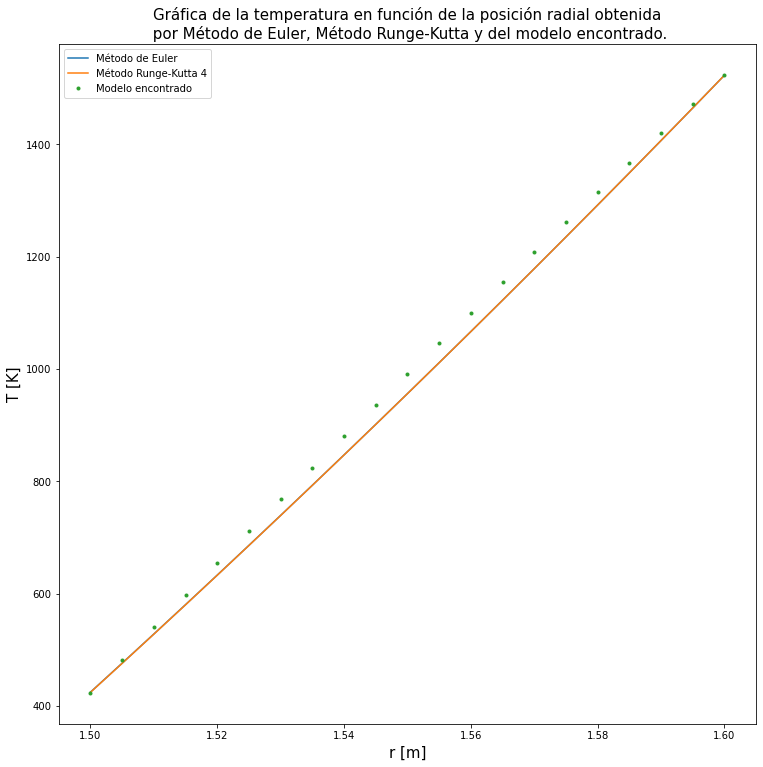

In [4]:
plt.figure(figsize=(12.5,12.5))
plt.plot(r, E)
plt.plot(r, RK4)
plt.plot(r, T(r), ".")
plt.legend(["Método de Euler", "Método Runge-Kutta 4", "Modelo encontrado"])
plt.xlabel("r [m]", fontsize=15)
plt.ylabel("T [K]", fontsize=15)
plt.title("Gráfica de la temperatura en función de la posición radial obtenida\n por Método de Euler, Método Runge-Kutta y del modelo encontrado.", fontsize=15)
plt.show()

# Porcentajes de Erros de los Métodos Numéricos.

## Comparación de los métodos:

Los porcentajes de error para los datos obtenidos por el método de Euler son: 

    Porcentaje de error [%]
0              2.985572e-14
1              4.491694e-01
2              8.826762e-01
3              1.298902e+00
4              1.695947e+00
5              2.071564e+00
6              2.423079e+00
7              2.747283e+00
8              3.040290e+00
9              3.297353e+00
10             3.512610e+00
11             3.678732e+00
12             3.786444e+00
13             3.823824e+00
14             3.775296e+00
15             3.620104e+00
16             3.329974e+00
17             2.865369e+00
18             2.169262e+00
19             1.156262e+00
20             3.075191e-01

Los porcentajes de error para los datos obtenidos por el método de Runge-Kutta 4 son: 

    Porcentaje de error [%]
0              2.985572e-14
1              4.493547e-01
2              8.831796e-01
3              1.299871e+00
4              1.697546e+00
5              2.073979e+00
6              2.42

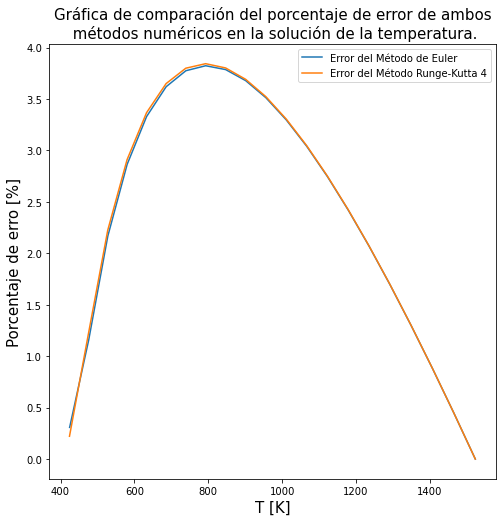

In [5]:
errorE = (abs(E - T(r))/T(r))*100
errorRK4 = (abs(RK4 - T(r))/T(r))*100

P_Errores_E = pd.DataFrame(errorE, columns = ["Porcentaje de error [%]"])
print("Los porcentajes de error para los datos obtenidos por el método de Euler son: \n")
print(P_Errores_E)

P_Errores_RK4 = pd.DataFrame(errorRK4, columns = ["Porcentaje de error [%]"])
print("\nLos porcentajes de error para los datos obtenidos por el método de Runge-Kutta 4 son: \n")
print(P_Errores_RK4)

print("\nLa comparación gráfica de ambos métodos numéricos es la siguiente:")

plt.figure(figsize=(8,8))
plt.plot(E, errorE)
plt.plot(RK4, errorRK4)
plt.legend(["Error del Método de Euler", "Error del Método Runge-Kutta 4"])
plt.xlabel("T [K]", fontsize=15)
plt.ylabel("Porcentaje de erro [%]", fontsize=15)
plt.title("Gráfica de comparación del porcentaje de error de ambos\n métodos numéricos en la solución de la temperatura.", fontsize=15)
plt.show()